## Decision Tree

In [14]:
import utils
X_train, X_test,y_train,y_test = utils.forest_preprocess()
print(X_train.shape,X_test.shape)

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_

/home/vionwinnie/miniconda3/envs/cs6476p6/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/vionwinnie/Documents/MachineLearning/hw1/utils.py:59: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  X_train_num = scaler.transform(X_train_num)
/home/vionwinnie/Documents/MachineLearning/hw1/utils.py:60: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  X_test_num = scaler.transform(X_test_num)


In [2]:
## Using Validation Set to tune hyperparameters
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier(criterion="entropy")

parameter_grid = {'max_depth': [3,5,7,9],
                  'max_features': [5,10,15,20]}

grid_search = GridSearchCV(decision_tree_classifier, 
                           param_grid = parameter_grid,
                           cv=3,
                           scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Best Score: {}".format(grid_search.best_score_))
print("Best params: {}".format(grid_search.best_params_))

Best Score: 0.7104001322751323
Best params: {'max_depth': 9, 'max_features': 20}


In [3]:
## Using test set to evaluate model performance 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
clf = DecisionTreeClassifier(criterion="entropy",
                                  max_depth=9,
                                  max_features=20,
                                  random_state=6)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
test_score = accuracy_score(y_test,y_pred)
print(test_score)

0.6871693121693122


Using accuracy score as scoring metrics


<module 'matplotlib.pyplot' from '/home/vionwinnie/miniconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

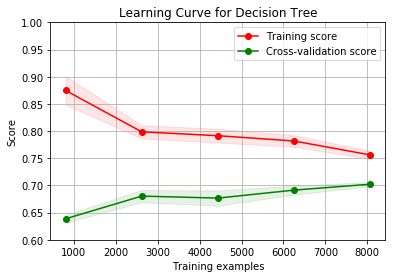

In [5]:
## Plotting Learning Curve 
import utils
title = 'Learning Curve for Decision Tree'
utils.plot_learning_curve(clf,title,X_train,y_train,ylim=(0.6,1),cv=3,n_jobs=4,scoring='accuracy')

In [ ]:
## Visualize Decision Tree 
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(clf, out_file=None,
                     feature_names=df.columns[:-1],
                      class_names=['a','b','c','d','e','f','g'],
                      filled=True, rounded=True,
                     special_characters=True)
graph = graphviz.Source(dot_data)
graph
graph.format = 'png'
graph.render('./WriteUp/images/forest_tree')  

## Neural Network

In [1]:
import keras
import matplotlib.pyplot as plt
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import SGD

import utils

Using TensorFlow backend.


In [2]:
X_train, X_test,y_train,y_test = utils.forest_preprocess(keras_training=True)


Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_

/home/vionwinnie/miniconda3/envs/cs6476p6/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/vionwinnie/Documents/MachineLearning/hw1/utils.py:59: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  X_train_num = scaler.transform(X_train_num)
/home/vionwinnie/Documents/MachineLearning/hw1/utils.py:60: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  X_test_num = scaler.transform(X_test_num)


In [ ]:
def create_model(optimizer=keras.optimizers.Adadelta(), init='glorot_uniform'):
    model = Sequential()
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(rate=0.15))
    model.add(Dense(30,activation='relu'))
    model.add(Dropout(rate=0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return model

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
start=time.time()

model = KerasClassifier(build_fn=create_model)
optimizers = ['rmsprop', 'adam','SGD', keras.optimizers.Adadelta()]
init = ['glorot_uniform', 'normal', 'uniform']
epochs = np.array([50, 100, 150])
batches = np.array([50, 100, 150])
param_grid = dict(optimizer=optimizers, batch_size=batches, init=init,nb_epoch=epochs)

grid = GridSearchCV(estimator=model, param_grid=param_grid,verbose=0,cv=3,scoring='neg_log_loss')
grid_result = grid.fit(X_train, y_train)


In [ ]:
print("Best Score: {}".format(grid_result.best_score_))
print("Best params: {}".format(grid_result.best_params_))

In [7]:
input_node = X_train.shape[1]
num_classes = 7

## Create the model layer by layer 
model = Sequential()
model.add(Dense(128,activation='relu',kernel_initializer='normal'))
model.add(Dropout(rate=0.15))
model.add(Dense(30,activation='relu',kernel_initializer='normal'))
model.add(Dropout(rate=0.5))
model.add(Dense(num_classes, activation='softmax',kernel_initializer='normal'))


model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])


# Fit the model
history = model.fit(X_train, y_train, validation_split=0.2,batch_size=50, epochs=150,verbose=0)
    

dict_keys(['val_acc', 'acc', 'loss', 'val_loss'])


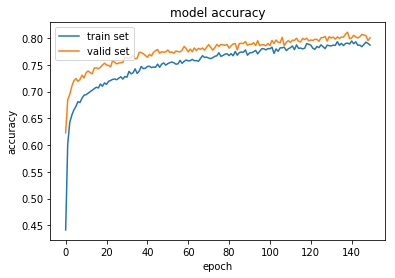

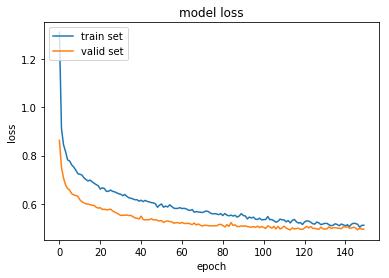

In [8]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train set', 'valid set'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train set', 'valid set'], loc='upper left')
plt.show()

In [9]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.49625556651877345
Test accuracy: 0.8032407407407407


In [13]:
import numpy as np
np.max(history.history['val_acc'])

0.8107437996332311

## k-Nearest Neighbor

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV

parameter_grid = {'n_neighbors':range(3,21,2),'weights':['uniform','distance']}

grid_search = GridSearchCV(knn, param_grid = parameter_grid,cv=3,scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best Score: {}".format(grid_search.best_score_))
print("Best params: {}".format(grid_search.best_params_))


Best Score: 0.7810019841269841
Best params: {'weights': 'distance', 'n_neighbors': 3}


In [19]:
## Use the best hyperparameters to train the model using the entire training set 
from sklearn.metrics import accuracy_score
clf = KNeighborsClassifier(n_neighbors=3,weights='distance')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
test_score = accuracy_score(y_test,y_pred)
print(test_score)

0.8131613756613757


Using accuracy score as scoring metrics


<module 'matplotlib.pyplot' from '/home/vionwinnie/miniconda3/envs/cs6476p6/lib/python3.5/site-packages/matplotlib/pyplot.py'>

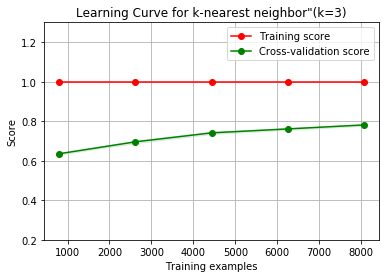

In [21]:
## Plotting Learning Curve 
title = 'Learning Curve for k-nearest neighbor"(k=3)'
utils.plot_learning_curve(clf,title,X_train,y_train,ylim=(0.2,1.3),cv=3,n_jobs=4,scoring='accuracy')

## Boosting

In [34]:
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm

gb = GradientBoostingClassifier(max_features=2, max_depth = 2, random_state = 0)

parameter_grid = {'n_estimators': [50, 100, 200],
                  'learning_rate': [0.25,0.4,0.5]}
grid_search = GridSearchCV(gb, param_grid = parameter_grid,cv=3,scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best Score: {}".format(grid_search.best_score_))
print("Best params: {}".format(grid_search.best_params_))


Best Score: 0.7687665343915344
Best params: {'learning_rate': 0.5, 'n_estimators': 200}


In [35]:
gb = GradientBoostingClassifier(n_estimators=200, 
                                learning_rate = 0.5, 
                                max_features=2, 
                                max_depth = 2, 
                                random_state = 0)
gb.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.5, loss='deviance', max_depth=2,
              max_features=2, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              n_iter_no_change=None, presort='auto', random_state=0,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [36]:
## Use the best hyperparameters to train the model using the entire training set 
from sklearn.metrics import accuracy_score
y_pred = gb.predict(X_test)
test_score = accuracy_score(y_test,y_pred)
print(test_score)

0.7870370370370371


Using accuracy score as scoring metrics


<module 'matplotlib.pyplot' from '/home/vionwinnie/miniconda3/envs/cs6476p6/lib/python3.5/site-packages/matplotlib/pyplot.py'>

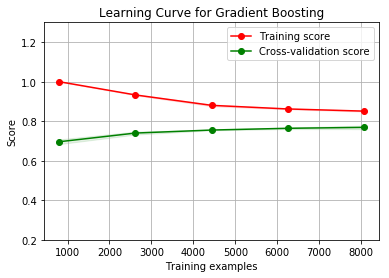

In [37]:
## Plotting Learning Curve 
title = 'Learning Curve for Gradient Boosting'
utils.plot_learning_curve(gb,title,X_train,y_train,ylim=(0.2,1.3),cv=3,n_jobs=4,scoring='accuracy')

In [38]:
#svm with grid search
from sklearn.svm import SVC

svm = SVC(degree=3,gamma='scale')
parameter_grid = {'kernel':('rbf','poly','sigmoid'),
                  'C':[0.1,1,10,100,1000]}

grid_search = GridSearchCV(svm, param_grid = parameter_grid,cv=3,scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best Score: {}".format(grid_search.best_score_))
print("Best params: {}".format(grid_search.best_params_))

Best Score: 0.8134093915343915
Best params: {'kernel': 'rbf', 'C': 1000}


In [40]:
## Evaluate model quality using test set
clf = SVC(C=1000,gamma='scale',kernel='rbf')
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
test_score = accuracy_score(y_test,y_pred)
print(test_score)

0.8425925925925926


Using accuracy score as scoring metrics


<module 'matplotlib.pyplot' from '/home/vionwinnie/miniconda3/envs/cs6476p6/lib/python3.5/site-packages/matplotlib/pyplot.py'>

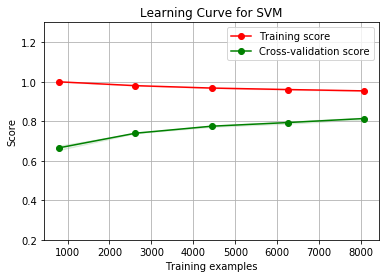

In [42]:
## Plotting Learning Curve 
title = 'Learning Curve for SVM'
utils.plot_learning_curve(clf,title,X_train,y_train,ylim=(0.2,1.3),cv=3,n_jobs=4,scoring='accuracy')

Text(0.5,1,'Test Error With Number of Trees')

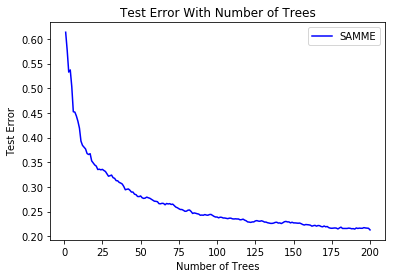

In [43]:
import matplotlib.pyplot as plt

real_test_errors = []

for real_test_predict in gb.staged_predict(X_test):
    real_test_errors.append(1. - accuracy_score(real_test_predict, y_test))

n_trees_discrete = len(gb)

plt.figure()
plt.plot(range(1, n_trees_discrete + 1),
         real_test_errors, c='blue', label='SAMME')
plt.legend()
plt.ylabel('Test Error')
plt.xlabel('Number of Trees')
plt.title('Test Error With Number of Trees')
